<a href="https://colab.research.google.com/github/mpsdecamargo/python_spec/blob/main/Marcos_de_Camargo_Specialisterne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.Introdução


# Projeto: Análise de dados de planilhas mensais de vendedores
# Formação Specialisterne em parceira com a XP Investimentos

## Autor: Marcos Paulo Santos de Camargo
## Período: 28 a 31/10/2024

# 1. Definição do problema e hipóteses

Há 3 planilhas de vendedores que correspondem aos dados de venda do período de janeiro de 2024. OS vendedores são: Matheus, Maria e Pedro. Deve-se carregar os dados das planilhas, tratá-los e analisá-los, com o intuito de descobrir qual foi o melhor vendedor durante o período, conforme os critérios a serem definidos de acordo com a opinião do autor.

Hipótese: Analisando as planilhas de Excel, a primeiro momento, Maria parece ser a melhor vendedora, mas isso precisa ser comprovado pela análise e visualização dos dados.

 # 2. Carregando Bibliotecas

In [688]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import drive
from datetime import datetime, timedelta

# 3. Acessando Datasets no Drive

In [689]:
#drive.mount('/content/drive')

## 3.1 Observação: Pasta no GitHub com planilhas adicionadas

# 4. Carregando Datasets

## 4.1 Teste de carregamento

In [690]:
#raw_df_pedro = pd.read_excel('/content/drive/MyDrive/Specialisterne/Análise Python/datasets/_pedro.xlsx', sheet_name="Pedro")
raw_df_pedro = pd.read_excel('planilhas/_pedro.xlsx', sheet_name="Pedro")
raw_df_pedro.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,ACOMPANHAMENTO DIÁRIO DE VENDAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mês / Ano,2024-01-01 00:00:00,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Vendedor,NaN,Pedro Henrique,NaN,NaN,NaN,NaN,Meta Mensal,NaN,NaN,2000,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Data,NaN,Venda,NaN,NaN,NaN,Acumulado,NaN,NaN,Planejamento Futuro,Tendência,NaN,Clientes Abordados,Vendas Fechadas,Taxa de Conversão


In [691]:
#raw_df_maria = pd.read_excel('/content/drive/MyDrive/Specialisterne/Análise Python/datasets/_maria.xlsx', sheet_name="Maria")
raw_df_maria = pd.read_excel('planilhas/_maria.xlsx', sheet_name="Maria")

raw_df_maria.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,ACOMPANHAMENTO DIÁRIO DE VENDAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mês / Ano,2024-01-01 00:00:00,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Vendedor,NaN,Maria Clara,NaN,NaN,NaN,NaN,Meta Mensal,NaN,NaN,2000,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Data,NaN,Venda,NaN,NaN,NaN,Acumulado,NaN,NaN,Planejamento Futuro,Tendência,NaN,Clientes Abordados,Vendas Fechadas,Taxa de Conversão


In [692]:
#raw_df_matheus = pd.read_excel('/content/drive/MyDrive/Specialisterne/Análise Python/datasets/_matheus.xlsx', sheet_name="Matheus")
raw_df_matheus = pd.read_excel('planilhas/_matheus.xlsx', sheet_name="Matheus")
raw_df_matheus.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,ACOMPANHAMENTO DIÁRIO DE VENDAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mês / Ano,2024-01-01 00:00:00,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Vendedor,NaN,Matheus Garcia,NaN,NaN,NaN,NaN,Meta Mensal,NaN,NaN,2000,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Data,NaN,Venda,NaN,NaN,NaN,Acumulado,NaN,NaN,Planejamento Futuro,Tendência,NaN,Clientes Abordados,Vendas Fechadas,Taxa de Conversão
5,NaN,NaN,NaN,Real,Projetada,Diferença,NaN,Real,Projetado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,2024-01-01 00:00:00,NaN,304,64.516129,239.483871,NaN,304,64.516129,NaN,NaN,304,NaN,10,2,0.2
7,NaN,2024-01-02 00:00:00,NaN,56.15,64.516129,-8.366129,NaN,360.15,129.032258,NaN,NaN,360.15,NaN,3,2,0.666667
8,NaN,2024-01-03 00:00:00,NaN,12,64.516129,-52.516129,NaN,372.15,193.548387,NaN,NaN,372.15,NaN,20,20,1
9,NaN,2024-01-04 00:00:00,NaN,90.164547,64.516129,25.648418,NaN,462.314547,258.064516,NaN,NaN,462.314547,NaN,5,3,0.6


## 4.2 Função para carregar datasets

In [693]:
def carregar_datasets(pasta):
  arquivos = glob.glob(f"{pasta}*.xlsx")
  dicionário_raw_datasets = dict()
  for arquivo in arquivos:
      nome_arquivo = arquivo.split('/')[-1].split('.')[0].replace('_','df_')
      raw_dataset = pd.read_excel(arquivo, sheet_name=1)
      print(f'Dataset {nome_arquivo} adicionado\nLinhas: {raw_dataset.shape[0]}\nColunas: {raw_dataset.shape[1]}')
      dicionário_raw_datasets.update({nome_arquivo: raw_dataset})
  return dicionário_raw_datasets

#raw_datasets = carregar_datasets("/content/drive/MyDrive/Specialisterne/Análise Python/datasets/")
raw_datasets = carregar_datasets("planilhas/")

Dataset df_maria adicionado
Linhas: 38
Colunas: 16
Dataset df_matheus adicionado
Linhas: 38
Colunas: 16
Dataset df_pedro adicionado
Linhas: 38
Colunas: 16


# 5. Tratamento dos dados

## 5.1 Encontrar informações iniciais

In [694]:
periodo = raw_df_matheus.iloc[0,11]
str_periodo = str(periodo)[0:7]
print(str_periodo)
nome_vendedor = raw_df_matheus.iloc[2,3]
print(nome_vendedor)
meta_mensal = raw_df_matheus.iloc[2,11]
print(meta_mensal)


2024-01
Matheus Garcia
2000


## 5.2 Selecionar parte da planilha para criar o dataset e checar formato das colunas e valores nulos

In [695]:
df_matheus = pd.DataFrame(raw_df_matheus.iloc[6:-1,1:])
print(df_matheus.shape)
df_matheus.info()

(31, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 6 to 36
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 1   31 non-null     object 
 1   Unnamed: 2   0 non-null      float64
 2   Unnamed: 3   23 non-null     object 
 3   Unnamed: 4   31 non-null     object 
 4   Unnamed: 5   23 non-null     object 
 5   Unnamed: 6   0 non-null      float64
 6   Unnamed: 7   23 non-null     object 
 7   Unnamed: 8   23 non-null     object 
 8   Unnamed: 9   0 non-null      float64
 9   Unnamed: 10  0 non-null      object 
 10  Unnamed: 11  23 non-null     object 
 11  Unnamed: 12  0 non-null      float64
 12  Unnamed: 13  23 non-null     object 
 13  Unnamed: 14  23 non-null     object 
 14  Unnamed: 15  23 non-null     object 
dtypes: float64(4), object(11)
memory usage: 3.8+ KB


## 5.3 Eliminar colunas contendo somente valores nulos

In [696]:
df_matheus.dropna(axis=1,how='all',inplace=True)
print(df_matheus.info())
print(df_matheus.shape)
print(df_matheus.head(50))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 6 to 36
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 1   31 non-null     object
 1   Unnamed: 3   23 non-null     object
 2   Unnamed: 4   31 non-null     object
 3   Unnamed: 5   23 non-null     object
 4   Unnamed: 7   23 non-null     object
 5   Unnamed: 8   23 non-null     object
 6   Unnamed: 11  23 non-null     object
 7   Unnamed: 13  23 non-null     object
 8   Unnamed: 14  23 non-null     object
 9   Unnamed: 15  23 non-null     object
dtypes: object(10)
memory usage: 2.6+ KB
None
(31, 10)
             Unnamed: 1 Unnamed: 3 Unnamed: 4  Unnamed: 5   Unnamed: 7  \
6   2024-01-01 00:00:00        304  64.516129  239.483871          304   
7   2024-01-02 00:00:00      56.15  64.516129   -8.366129       360.15   
8   2024-01-03 00:00:00         12  64.516129  -52.516129       372.15   
9   2024-01-04 00:00:00  90.164547  64.516129   25.648

## 5.4 Adicionar nomes das colunas de acordo com as planilhas

In [697]:
colunas_df_matheus = ["data","venda_real","venda_projetada","venda_diferenca","acumulado_real","acumulado_projetado","tendencia","clientes_abordados","vendas_fechadas","taxa_conversao"]
df_matheus.columns = colunas_df_matheus
df_matheus.head(50)

,data,venda_real,venda_projetada,venda_diferenca,acumulado_real,acumulado_projetado,tendencia,clientes_abordados,vendas_fechadas,taxa_conversao
6,2024-01-01 00:00:00,304,64.516129,239.483871,304,64.516129,304,10,2,0.2
7,2024-01-02 00:00:00,56.15,64.516129,-8.366129,360.15,129.032258,360.15,3,2,0.666667
8,2024-01-03 00:00:00,12,64.516129,-52.516129,372.15,193.548387,372.15,20,20,1
9,2024-01-04 00:00:00,90.164547,64.516129,25.648418,462.314547,258.064516,462.314547,5,3,0.6
10,2024-01-05 00:00:00,50.091415,64.516129,-14.424714,512.405962,322.580645,512.405962,6,3,0.5
11,2024-01-06 00:00:00,123.97,64.516129,59.453871,636.375962,387.096774,636.375962,7,4,0.571429
12,2024-01-07 00:00:00,184.21,64.516129,119.693871,820.585962,451.612903,820.585962,9,7,0.777778
13,2024-01-08 00:00:00,190,64.516129,125.483871,1010.585962,516.129032,1010.585962,7,5,0.714286
14,2024-01-09 00:00:00,83.089647,64.516129,18.573518,1093.675609,580.645161,1093.675609,5,2,0.4
15,2024-01-10 00:00:00,61.855626,64.516129,-2.660503,1155.531235,645.16129,1155.531235,3,1,0.333333


## 5.5 Zerar o index para facilitar o tratamento

In [698]:
df_matheus.reset_index(drop=True, inplace=True)
df_matheus.head()

,data,venda_real,venda_projetada,venda_diferenca,acumulado_real,acumulado_projetado,tendencia,clientes_abordados,vendas_fechadas,taxa_conversao
0,2024-01-01 00:00:00,304,64.516129,239.483871,304,64.516129,304,10,2,0.2
1,2024-01-02 00:00:00,56.15,64.516129,-8.366129,360.15,129.032258,360.15,3,2,0.666667
2,2024-01-03 00:00:00,12,64.516129,-52.516129,372.15,193.548387,372.15,20,20,1
3,2024-01-04 00:00:00,90.164547,64.516129,25.648418,462.314547,258.064516,462.314547,5,3,0.6
4,2024-01-05 00:00:00,50.091415,64.516129,-14.424714,512.405962,322.580645,512.405962,6,3,0.5


## 5.6 Substituir os valores nulos das colunas por zero

In [699]:
df_matheus.fillna(0, inplace=True)
df_matheus.head(50)

<ipython-input-699-89adab6c7f33>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_matheus.fillna(0, inplace=True)


,data,venda_real,venda_projetada,venda_diferenca,acumulado_real,acumulado_projetado,tendencia,clientes_abordados,vendas_fechadas,taxa_conversao
0,2024-01-01,304.000000,64.516129,239.483871,304.000000,64.516129,304.000000,10,2,0.200000
1,2024-01-02,56.150000,64.516129,-8.366129,360.150000,129.032258,360.150000,3,2,0.666667
2,2024-01-03,12.000000,64.516129,-52.516129,372.150000,193.548387,372.150000,20,20,1.000000
3,2024-01-04,90.164547,64.516129,25.648418,462.314547,258.064516,462.314547,5,3,0.600000
4,2024-01-05,50.091415,64.516129,-14.424714,512.405962,322.580645,512.405962,6,3,0.500000
5,2024-01-06,123.970000,64.516129,59.453871,636.375962,387.096774,636.375962,7,4,0.571429
6,2024-01-07,184.210000,64.516129,119.693871,820.585962,451.612903,820.585962,9,7,0.777778
7,2024-01-08,190.000000,64.516129,125.483871,1010.585962,516.129032,1010.585962,7,5,0.714286
8,2024-01-09,83.089647,64.516129,18.573518,1093.675609,580.645161,1093.675609,5,2,0.400000
9,2024-01-10,61.855626,64.516129,-2.660503,1155.531235,645.161290,1155.531235,3,1,0.333333


## 5.7 Substituir os valores da coluna "Data" pelo formato certo

In [700]:
df_matheus["index"] = df_matheus.index + 1
df_matheus["data"]= pd.to_datetime(str_periodo + "-" + df_matheus["index"].astype(str),format='%Y-%m-%d')
df_matheus.drop("index", axis=1, inplace=True)
df_matheus.head()

,data,venda_real,venda_projetada,venda_diferenca,acumulado_real,acumulado_projetado,tendencia,clientes_abordados,vendas_fechadas,taxa_conversao
0,2024-01-01,304.000000,64.516129,239.483871,304.000000,64.516129,304.000000,10,2,0.200000
1,2024-01-02,56.150000,64.516129,-8.366129,360.150000,129.032258,360.150000,3,2,0.666667
2,2024-01-03,12.000000,64.516129,-52.516129,372.150000,193.548387,372.150000,20,20,1.000000
3,2024-01-04,90.164547,64.516129,25.648418,462.314547,258.064516,462.314547,5,3,0.600000
4,2024-01-05,50.091415,64.516129,-14.424714,512.405962,322.580645,512.405962,6,3,0.500000


## 5.8 Formatar os valores das colunas e verificar

In [701]:
colunas_float = ["venda_real","venda_projetada","venda_diferenca","acumulado_real","acumulado_projetado","tendencia","taxa_conversao"]
colunas_int = ["clientes_abordados","vendas_fechadas"]
df_matheus[colunas_float].astype(float)
df_matheus[colunas_int].astype(int)
df_matheus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data                 31 non-null     datetime64[ns]
 1   venda_real           31 non-null     float64       
 2   venda_projetada      31 non-null     float64       
 3   venda_diferenca      31 non-null     float64       
 4   acumulado_real       31 non-null     float64       
 5   acumulado_projetado  31 non-null     float64       
 6   tendencia            31 non-null     float64       
 7   clientes_abordados   31 non-null     int64         
 8   vendas_fechadas      31 non-null     int64         
 9   taxa_conversao       31 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 2.5 KB


## 5.9 Utilizar a coluna "data" como index

In [702]:
df_matheus.set_index('data', inplace=True)
df_matheus.head()

,venda_real,venda_projetada,venda_diferenca,acumulado_real,acumulado_projetado,tendencia,clientes_abordados,vendas_fechadas,taxa_conversao
data,,,,,,,,,
2024-01-01,304.000000,64.516129,239.483871,304.000000,64.516129,304.000000,10,2,0.200000
2024-01-02,56.150000,64.516129,-8.366129,360.150000,129.032258,360.150000,3,2,0.666667
2024-01-03,12.000000,64.516129,-52.516129,372.150000,193.548387,372.150000,20,20,1.000000
2024-01-04,90.164547,64.516129,25.648418,462.314547,258.064516,462.314547,5,3,0.600000
2024-01-05,50.091415,64.516129,-14.424714,512.405962,322.580645,512.405962,6,3,0.500000


## 5.10 Criar coluna "dia_da_semana"

In [703]:
df_matheus["dia_da_semana"] = df_matheus.index.day_name()
df_matheus.head()

,venda_real,venda_projetada,venda_diferenca,acumulado_real,acumulado_projetado,tendencia,clientes_abordados,vendas_fechadas,taxa_conversao,dia_da_semana
data,,,,,,,,,,
2024-01-01,304.000000,64.516129,239.483871,304.000000,64.516129,304.000000,10,2,0.200000,Monday
2024-01-02,56.150000,64.516129,-8.366129,360.150000,129.032258,360.150000,3,2,0.666667,Tuesday
2024-01-03,12.000000,64.516129,-52.516129,372.150000,193.548387,372.150000,20,20,1.000000,Wednesday
2024-01-04,90.164547,64.516129,25.648418,462.314547,258.064516,462.314547,5,3,0.600000,Thursday
2024-01-05,50.091415,64.516129,-14.424714,512.405962,322.580645,512.405962,6,3,0.500000,Friday


# 6. Funções para tratamento dos dados

## 6.1 Função para achar informações iniciais

In [704]:
# Caso seja necessário encontrar um dado específico

def achar_periodo_tempo_planilha(dataset):
  periodo = dataset.iloc[0,11]
  str_periodo = str(periodo)[0:7]
  return str_periodo

def achar_nome_vendedor_planilha(dataset):
  nome_vendedor = dataset.iloc[2,3]
  return nome_vendedor

def achar_meta_mensal_planilha(dataset):
  meta_mensal = float(dataset.iloc[2,11])
  return meta_mensal

# Caso seja necessário automatizar a aquisição de informações iniciais das planilhas

def achar_informacoes_iniciais_planilhas(raw_datasets):
  dicionario_info_inicial = dict()
  for chave, dataset in raw_datasets.items():
    dicionario_dataset = dict()
    periodo = achar_periodo_tempo_planilha(dataset)
    nome_vendedor = achar_nome_vendedor_planilha(dataset)
    meta_mensal = achar_meta_mensal_planilha(dataset)
    dicionario_dataset.update({ "Periodo" : periodo, "Nome vendedor" : nome_vendedor, "Meta mensal" : meta_mensal})
    dicionario_info_inicial.update({chave : dicionario_dataset})
  return dicionario_info_inicial

achar_informacoes_iniciais_planilhas(raw_datasets)


{'df_maria': {'Periodo': '2024-01',
  'Nome vendedor': 'Maria Clara',
  'Meta mensal': 2000.0},
 'df_matheus': {'Periodo': '2024-01',
  'Nome vendedor': 'Matheus Garcia',
  'Meta mensal': 2000.0},
 'df_pedro': {'Periodo': '2024-01',
  'Nome vendedor': 'Pedro Henrique',
  'Meta mensal': 2000.0}}

## 6.2 Função para transformar planilhas em dataframes

In [705]:
def transformar_planilhas_em_dataframes(raw_datasets):
  dicionario_dataframes = dict()
  for chave, dataset in raw_datasets.items():
    nome_dataframe = str()
    nome_dataframe = chave
    dataframe = chave
    dataframe = pd.DataFrame(dataset.iloc[6:-1,1:])
    dicionario_dataframes.update({ nome_dataframe : dataframe})
    print(f'Dataset {nome_dataframe} adicionado\nLinhas: {dataframe.shape[0]}\nColunas: {dataframe.shape[1]}')
  return dicionario_dataframes

dataframes = transformar_planilhas_em_dataframes(raw_datasets)

Dataset df_maria adicionado
Linhas: 31
Colunas: 15
Dataset df_matheus adicionado
Linhas: 31
Colunas: 15
Dataset df_pedro adicionado
Linhas: 31
Colunas: 15


## 6.3 Funções auxiliares para tratamento de dados (etapas 5.2 a 5.10)

In [706]:
def eliminar_colunas_vazias_dataframe(dataframe):
  dataframe.dropna(axis=1,how='all',inplace=True)
  return dataframe

def adicionar_nomes_colunas_dataframe(dataframe):
  colunas_dataframe = ["data","venda_real","venda_projetada","venda_diferenca","acumulado_real","acumulado_projetado","tendencia","clientes_abordados","vendas_fechadas","taxa_conversao"]
  dataframe.columns = colunas_dataframe
  return dataframe

def resetar_index_dataframe(dataframe):
    dataframe.reset_index(drop=True, inplace=True)
    return dataframe

def substituir_valores_nulos_dataframe(dataframe):
  dataframe.fillna(0, inplace=True)
  return dataframe

def transformar_coluna_data_dataframe(dataframe):
  dataframe["index"] = dataframe.index + 1
  dataframe["data"] = pd.to_datetime(str_periodo + "-" + dataframe["index"].astype(str),format='%Y-%m-%d')
  dataframe.drop("index", axis=1, inplace=True)
  return dataframe

def formatar_colunas_dataframe(dataframe):
  colunas_float = ["venda_real","venda_projetada","venda_diferenca","acumulado_real","acumulado_projetado","tendencia","taxa_conversao"]
  colunas_int = ["clientes_abordados","vendas_fechadas"]
  dataframe[colunas_float].astype(float)
  dataframe[colunas_int].astype(int)
  return dataframe

def definir_data_como_index_dataframe(dataframe):
  dataframe.set_index('data', inplace=True)
  return dataframe

def adicionar_coluna_dia_semana_dataframe(dataframe):
  dataframe["dia_da_semana"] = dataframe.index.day_name()

## 6.4 Função para tratamento de dados

In [707]:
def tratar_dados_dataframe(dataframe : pd.core.frame.DataFrame):
  eliminar_colunas_vazias_dataframe(dataframe)
  adicionar_nomes_colunas_dataframe(dataframe)
  resetar_index_dataframe(dataframe)
  substituir_valores_nulos_dataframe(dataframe)
  transformar_coluna_data_dataframe(dataframe)
  formatar_colunas_dataframe(dataframe)
  definir_data_como_index_dataframe(dataframe)
  adicionar_coluna_dia_semana_dataframe(dataframe)
  return dataframe

def tratar_dados_dataframes(dataframes : dict):
  dicionario_dataframes_tratados = dict()
  for chave, dataframe in dataframes.items():
    dataframe = tratar_dados_dataframe(dataframe)
    dicionario_dataframes_tratados.update({chave : dataframe})
    print(f'Dataset {chave} tratado\nLinhas: {dataframe.shape[0]}\nColunas: {dataframe.shape[1]}')
    print(type(dataframe))
  return dicionario_dataframes_tratados

In [708]:
dic_dataframes = tratar_dados_dataframes(dataframes)

Dataset df_maria tratado
Linhas: 31
Colunas: 10
<class 'pandas.core.frame.DataFrame'>
Dataset df_matheus tratado
Linhas: 31
Colunas: 10
<class 'pandas.core.frame.DataFrame'>
Dataset df_pedro tratado
Linhas: 31
Colunas: 10
<class 'pandas.core.frame.DataFrame'>


<ipython-input-706-307ef61b10a9>:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.fillna(0, inplace=True)
<ipython-input-706-307ef61b10a9>:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.fillna(0, inplace=True)
<ipython-input-706-307ef61b10a9>:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.fillna(0, inp

# 7. Criação das métricas

## 7.1 Criação das métricas iniciais

In [709]:
def avaliar_metricas_mensais_principais_vendedor(dataframe : pd.core.frame.DataFrame, dia_inicial : int, dia_final : int):
  dic_metricas_principais_vendedor = dict()
  vendedor_total_venda = dataframe["venda_real"].iloc[dia_inicial -1 : dia_final].sum().astype(float).round(2)
  vendedor_total_clientes_abordados = dataframe["clientes_abordados"].iloc[dia_inicial -1 : dia_final].sum()
  vendedor_total_vendas_fechadas = dataframe["vendas_fechadas"].iloc[dia_inicial -1 : dia_final].sum()
  vendedor_taxa_conversao_periodo = dataframe["taxa_conversao"].iloc[dia_inicial -1 : dia_final].mean().astype(float).round(2)
  vendedor_dias_com_vendas = dataframe["venda_real"][dataframe["venda_real"] > 0].iloc[dia_inicial -1 : dia_final].count()
  #print(f"Total de Vendas no período: R$ {vendedor_total_venda}\nTotal de vendas fechadas: {vendedor_total_vendas_fechadas}\nTotal de clientes abordados: {vendedor_total_clientes_abordados}\nTaxa de conversão geral no período: {vendedor_taxa_conversao_periodo}%\nDias com vendas: {vendedor_dias_com_vendas}")
  dic_metricas_principais_vendedor = {"Total de Vendas no período" : vendedor_total_venda, "Total de vendas fechadas" :vendedor_total_vendas_fechadas, "Total de clientes abordados" : vendedor_total_clientes_abordados                                                                                                                                                                                    , "Taxa de conversão geral no período" : vendedor_taxa_conversao_periodo, "Dias com vendas": vendedor_dias_com_vendas}
  return dic_metricas_principais_vendedor

def avaliar_metricas_mensais_principais_vendedores(dic_dataframes : dict, dia_inicial : int, dia_final : int):
  dic_metricas_principais_vendedores = dict()
  for chave, dataframe in dic_dataframes.items():
      resultado = avaliar_metricas_mensais_principais_vendedor(dataframe, dia_inicial, dia_final)
      dic_metricas_principais_vendedores.update({chave : resultado})
  return dic_metricas_principais_vendedores


In [710]:
avaliar_metricas_mensais_principais_vendedor(df_matheus,1,31)

{'Total de Vendas no período': 2154.02,
 'Total de vendas fechadas': 108,
 'Total de clientes abordados': 186,
 'Taxa de conversão geral no período': 0.42,
 'Dias com vendas': 23}

In [711]:
avaliar_metricas_mensais_principais_vendedores(dic_dataframes, 1, 31)

{'df_maria': {'Total de Vendas no período': 2539.52,
  'Total de vendas fechadas': 101,
  'Total de clientes abordados': 112,
  'Taxa de conversão geral no período': 0.89,
  'Dias com vendas': 23},
 'df_matheus': {'Total de Vendas no período': 2154.02,
  'Total de vendas fechadas': 108,
  'Total de clientes abordados': 186,
  'Taxa de conversão geral no período': 0.42,
  'Dias com vendas': 23},
 'df_pedro': {'Total de Vendas no período': 1596.38,
  'Total de vendas fechadas': 74,
  'Total de clientes abordados': 88,
  'Taxa de conversão geral no período': 0.72,
  'Dias com vendas': 23}}

## 7.2 Função para criar a tabela com métricas secundárias

In [712]:
df_pedro.describe()

,venda_real,venda_projetada,venda_diferenca,acumulado_real,acumulado_projetado,tendencia,clientes_abordados,vendas_fechadas,taxa_conversao
count,31.000000,3.100000e+01,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,51.496226,6.451613e+01,3.629420,571.867984,574.401665,571.867984,2.838710,2.387097,0.720661
std,53.174252,4.333728e-14,43.348620,508.643243,508.915952,508.643243,2.805908,2.124106,0.555284
min,0.000000,6.451613e+01,-54.733129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.891500,6.451613e+01,-20.492629,39.132000,32.258065,39.132000,0.500000,0.500000,0.100000
50%,39.132000,6.451613e+01,0.000000,606.546000,516.129032,606.546000,2.000000,2.000000,0.857143
75%,78.264000,6.451613e+01,13.747871,911.573000,1000.000000,911.573000,4.500000,4.000000,1.000000
max,195.660000,6.451613e+01,131.143871,1596.383000,1483.870968,1596.383000,10.000000,7.000000,2.000000


In [713]:
def avaliar_metricas_mensais_secundarias_vendedor(dataframe : pd.core.frame.DataFrame, dia_inicial : int, dia_final : int):

  vendedor_max_clientes_dia = dataframe["clientes_abordados"].iloc[dia_inicial -1 : dia_final].max()
  vendedor_media_clientes_dia = dataframe["clientes_abordados"].iloc[dia_inicial -1 : dia_final].mean()
  vendedor_min_clientes_dia = dataframe["clientes_abordados"].iloc[dia_inicial -1 : dia_final].min()
  vendedor_amplitude_clientes_dia = vendedor_max_clientes_dia - vendedor_min_clientes_dia

  vendedor_max_vendas_fechadas = dataframe["vendas_fechadas"].iloc[dia_inicial -1 : dia_final].max()
  vendedor_media_vendas_fechadas = dataframe["vendas_fechadas"].iloc[dia_inicial -1 : dia_final].mean()
  vendedor_min_vendas_fechadas = dataframe["vendas_fechadas"].iloc[dia_inicial -1 : dia_final].min()
  vendedor_amplitude_vendas_fechadas = vendedor_max_vendas_fechadas - vendedor_min_vendas_fechadas

  vendedor_max_taxa_conversao = dataframe["taxa_conversao"].iloc[dia_inicial -1 : dia_final].max()
  vendedor_media_taxa_conversao = dataframe["taxa_conversao"].iloc[dia_inicial -1 : dia_final].mean()
  vendedor_min_taxa_conversao = dataframe["taxa_conversao"].iloc[dia_inicial -1 : dia_final].min()
  vendedor_amplitude_taxa_conversao = vendedor_max_taxa_conversao - vendedor_min_taxa_conversao

  vendedor_max_venda_real = dataframe["venda_real"].iloc[dia_inicial -1 : dia_final].max()
  vendedor_media_venda_real = dataframe["venda_real"].iloc[dia_inicial -1 : dia_final].mean()
  vendedor_min_venda_real = dataframe["venda_real"].iloc[dia_inicial -1 : dia_final].min()
  vendedor_amplitude_venda_real = vendedor_max_venda_real - vendedor_min_venda_real

  vendedor_max_venda_diferenca = dataframe["venda_diferenca"].iloc[dia_inicial -1 : dia_final].max()
  vendedor_media_venda_diferenca = dataframe["venda_diferenca"].iloc[dia_inicial -1 : dia_final].mean()
  vendedor_min_venda_diferenca = dataframe["venda_diferenca"].iloc[dia_inicial -1 : dia_final].min()
  vendedor_amplitude_venda_diferenca = vendedor_max_venda_diferenca - vendedor_min_venda_diferenca

  coluna_nome_metricas = ["Venda Real", "Venda Diferença", "Vendas Fechadas", "Clientes por Dia", "Taxa de Conversão"]
  coluna_min = [vendedor_min_venda_real, vendedor_min_venda_diferenca, vendedor_min_vendas_fechadas, vendedor_min_clientes_dia, vendedor_min_taxa_conversao]
  coluna_media = [vendedor_media_venda_real, vendedor_media_venda_diferenca, vendedor_media_vendas_fechadas, vendedor_media_clientes_dia, vendedor_media_taxa_conversao]
  coluna_max = [vendedor_max_venda_real, vendedor_max_venda_diferenca, vendedor_max_vendas_fechadas, vendedor_max_clientes_dia, vendedor_max_taxa_conversao]
  coluna_amplitude = [vendedor_amplitude_venda_real, vendedor_amplitude_venda_diferenca, vendedor_amplitude_vendas_fechadas, vendedor_amplitude_clientes_dia, vendedor_amplitude_taxa_conversao]
  nomes_colunas_tabela = ["Métrica","Mínimo","Médio","Máximo","Amplitude"]
  lista_colunas_tabela = [coluna_nome_metricas, coluna_min, coluna_media, coluna_max, coluna_amplitude]
  dicionario_tabela = dict()
  for i in range(len(nomes_colunas_tabela)):
    dicionario_tabela.update({nomes_colunas_tabela[i] : lista_colunas_tabela[i]})
  tabela_metricas_mensais_secundarias_vendedor = pd.DataFrame(dicionario_tabela)
  tabela_metricas_mensais_secundarias_vendedor.set_index("Métrica", inplace=True)
  tabela_metricas_mensais_secundarias_vendedor = tabela_metricas_mensais_secundarias_vendedor.astype(float).round(2)

  return tabela_metricas_mensais_secundarias_vendedor

def avaliar_metricas_mensais_secundarias_vendedores(dic_dataframes : dict(), dia_inicial : int, dia_final : int):
  dic_metricas_secundarias_vendedores = dict()
  for chave, dataframe in dic_dataframes.items():
      resultado = avaliar_metricas_mensais_secundarias_vendedor(dataframe, dia_inicial, dia_final)
      dic_metricas_secundarias_vendedores.update({chave : resultado})
  return dic_metricas_secundarias_vendedores

In [714]:
avaliar_metricas_mensais_secundarias_vendedor(df_matheus, 1, 31)

,Mínimo,Médio,Máximo,Amplitude
Métrica,,,,
Venda Real,0.00,69.48,304.00,304.0
Venda Diferença,-52.52,21.62,239.48,292.0
Vendas Fechadas,0.00,3.48,20.00,20.0
Clientes por Dia,0.00,6.00,25.00,25.0
Taxa de Conversão,0.00,0.42,1.00,1.0


In [715]:
avaliar_metricas_mensais_secundarias_vendedores(dic_dataframes, 1, 23)

{'df_maria':                    Mínimo   Médio  Máximo  Amplitude
 Métrica                                             
 Venda Real          12.00  110.41  407.00     395.00
 Venda Diferença    -52.52   45.90  342.48     395.00
 Vendas Fechadas      1.00    4.39    9.00       8.00
 Clientes por Dia     1.00    4.87   10.00       9.00
 Taxa de Conversão    0.33    1.20    4.00       3.67,
 'df_matheus':                    Mínimo  Médio  Máximo  Amplitude
 Métrica                                            
 Venda Real          12.00  93.65  304.00     292.00
 Venda Diferença    -52.52  29.14  239.48     292.00
 Vendas Fechadas      1.00   4.70   20.00      19.00
 Clientes por Dia     3.00   8.09   25.00      22.00
 Taxa de Conversão    0.15   0.57    1.00       0.85,
 'df_pedro':                    Mínimo  Médio  Máximo  Amplitude
 Métrica                                            
 Venda Real           9.78  69.41  195.66     185.88
 Venda Diferença    -54.73   4.89  131.14     185.88

## 7.3 Função para avaliar receita de venda real por cliente e por venda fechada

In [716]:
def avaliar_media_receita_venda_real_por_cliente_abordado(dataframe : pd.core.frame.DataFrame, dia_inicial : int, dia_final : int):

  vendedor_media_receita_venda_real_cliente_abordado = dataframe["venda_real"].iloc[dia_inicial -1 : dia_final].sum()/dataframe["clientes_abordados"].iloc[dia_inicial -1 : dia_final].sum()
  vendedor_media_receita_venda_real_cliente_abordado = vendedor_media_receita_venda_real_cliente_abordado.astype(float).round(2)

  return vendedor_media_receita_venda_real_cliente_abordado

def avaliar_media_receita_venda_real_por_venda_fechada(dataframe : pd.core.frame.DataFrame, dia_inicial : int, dia_final : int):

  vendedor_media_receita_venda_real_venda_fechada = dataframe["venda_real"].iloc[dia_inicial -1 : dia_final].sum()/dataframe["vendas_fechadas"].iloc[dia_inicial -1 : dia_final].sum()
  vendedor_media_receita_venda_real_venda_fechada = vendedor_media_receita_venda_real_venda_fechada.astype(float).round(2)

  return vendedor_media_receita_venda_real_venda_fechada

In [717]:
avaliar_media_receita_venda_real_por_cliente_abordado(df_matheus, 1, 31)

11.58

In [718]:
avaliar_media_receita_venda_real_por_venda_fechada(df_matheus, 1, 31)

19.94

## 7.4 Função para avaliar receita de venda real por taxa de conversão média

In [719]:
def avaliar_metrica_receita_venda_real_vezes_taxa_conversao_media(dataframe : pd.core.frame.DataFrame, dia_inicial : int, dia_final : int):
  dias_trabalhados = (dataframe["venda_real"][dataframe["venda_real"]>0].iloc[dia_inicial -1 : dia_final]).count()
  vendedor_metrica_receita_venda_real_vezes_taxa_conversao_media = (dataframe["venda_real"].iloc[dia_inicial -1 : dia_final].sum())*((dataframe["taxa_conversao"].iloc[dia_inicial -1 : dia_final]).mean())
  vendedor_metrica_receita_venda_real_vezes_taxa_conversao_media = vendedor_metrica_receita_venda_real_vezes_taxa_conversao_media.astype(float).round(2)

  return vendedor_metrica_receita_venda_real_vezes_taxa_conversao_media

In [720]:
avaliar_metrica_receita_venda_real_vezes_taxa_conversao_media(df_matheus, 1, 31)

909.58

# 8. Criação das Visualizações

## 8.1 Gráfico de linha de vendas reais vs meta

In [721]:
def criar_grafico_linha_venda_real_vs_meta(dataframes : dict(), nome_dataframe : str, dia_inicial : int, dia_final : int):
  sns.set_theme(style="whitegrid")

  dataframe = dataframes[nome_dataframe]
  data = dataframe["venda_real"].iloc[dia_inicial -1 : dia_final]

  meta_mensal = achar_meta_mensal_planilha(raw_datasets[nome_dataframe])
  dias_trabalhados = dataframe[dataframe["venda_real"]>0].iloc[dia_inicial -1 : dia_final].count()
  meta_diaria = (meta_mensal / dataframe.shape[0])
  meta_diaria_dias_trabalhados = (meta_mensal / dias_trabalhados).mean().astype(float).round(2)

  sns.lineplot(data=data, palette="tab10", linewidth=2.5)
  plt.axhline(y=meta_diaria, color='green', linestyle='solid', label='Meta diária')
  plt.axhline(y=meta_diaria_dias_trabalhados, color='red', linestyle='solid', label='Meta diária p/ dias trabalhados')
  plt.xticks(rotation=90)
  plt.title("Vendas reais diárias vs meta diária")
  plt.legend()

  plt.show()

<ipython-input-721-48802b221916>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, palette="tab10", linewidth=2.5)


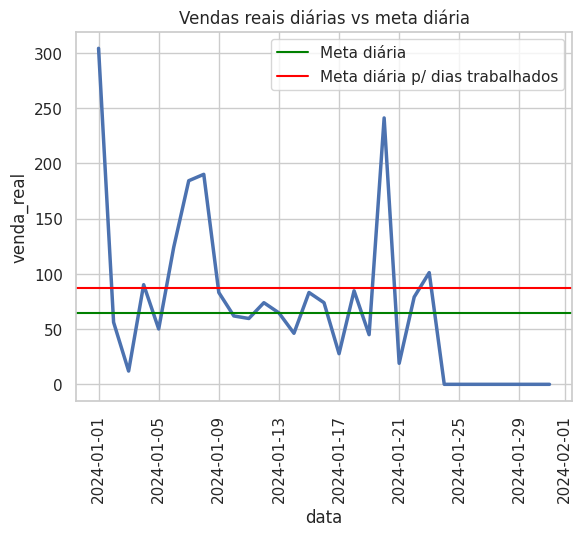

In [722]:
criar_grafico_linha_venda_real_vs_meta(dataframes, "df_matheus", 1, 31)

## 8.2 Gráfico de linha acumulado de vendas vs projetado

In [723]:
def criar_grafico_linha_acumulado_vendas_vs_projetadas(dataframe : pd.core.frame.DataFrame, dia_inicial : int, dia_final : int):
  sns.set_theme(style="whitegrid")

  data = pd.DataFrame(dataframe.iloc[dia_inicial -1 : dia_final], dataframe.iloc[dia_inicial -1 : dia_final].index, columns=["acumulado_real","acumulado_projetado"])

  sns.lineplot(data=data, palette="tab10", linewidth=2.5)
  plt.xticks(rotation=90)
  plt.title("Vendas reais vs projetadas")
  plt.legend()

  plt.show()

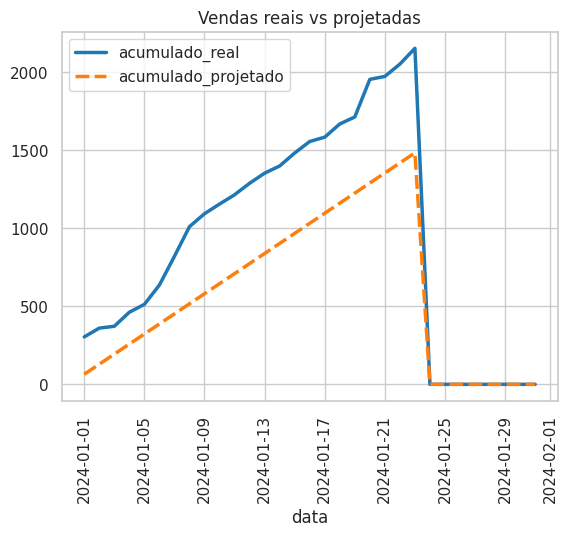

In [724]:
criar_grafico_linha_acumulado_vendas_vs_projetadas(df_matheus, 1, 31)

## 8.3 Gráfico de linha vendas fechadas vs clientes abordados

In [725]:
def criar_grafico_linha_vendas_fechadas_vs_clientes_abordados(dataframe : pd.core.frame.DataFrame, dia_inicial : int, dia_final : int):
  sns.set_theme(style="whitegrid")

  data = pd.DataFrame(dataframe.iloc[dia_inicial -1 : dia_final], dataframe.iloc[dia_inicial -1 : dia_final].index, columns=["vendas_fechadas","clientes_abordados"])
  sns.lineplot(data=data, palette="tab10", linewidth=2.5)
  plt.xticks(rotation=90)
  plt.title("Vendas fechadas vs clientes abordados")
  plt.legend()

  plt.show()

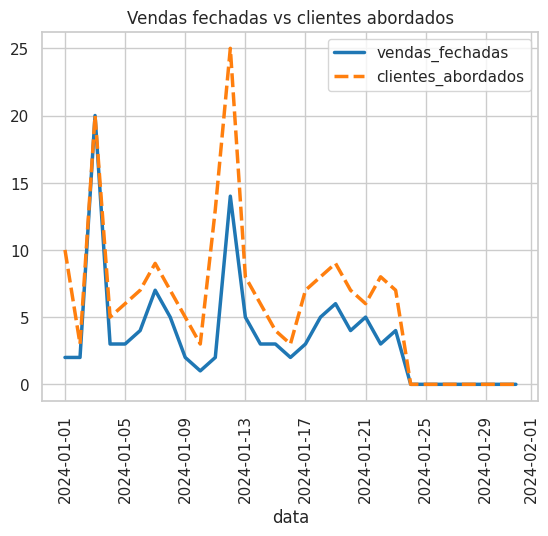

In [726]:
criar_grafico_linha_vendas_fechadas_vs_clientes_abordados(df_matheus, 1, 31)

## 8.4 Gráfico de linha evolução da taxa de conversão diária

In [727]:
def criar_grafico_linha_evolução_taxa_conversao_diaria(dataframe : pd.core.frame.DataFrame, dia_inicial : int, dia_final : int):
  sns.set_theme(style="whitegrid")

  taxa_conversao = dataframe.iloc[dia_inicial -1 : dia_final]["taxa_conversao"]
  taxa_conversao_media = taxa_conversao.mean()
  taxa_conversao_max = round(taxa_conversao.max(), 2)
  taxa_conversao_min = round(taxa_conversao.min(), 2)

  data_conversao = pd.DataFrame(dataframe.iloc[dia_inicial -1 : dia_final], dataframe.iloc[dia_inicial -1 : dia_final].index, columns=["taxa_conversao"])
  sns.lineplot(data=data_conversao, palette="tab10", linewidth=2.5)

  plt.axhline(y=taxa_conversao_media, color='blue', linestyle='solid', label='Taxa de conversão média')

  plt.annotate(f'Máxima: {taxa_conversao_max}', xy=(taxa_conversao.idxmax(), taxa_conversao_max), xytext=(taxa_conversao.idxmax(), taxa_conversao_max))
  plt.annotate(f'Mínima: {taxa_conversao_min}', xy=(taxa_conversao.idxmin(), taxa_conversao_min), xytext=(taxa_conversao.idxmin(), taxa_conversao_min))


  plt.xticks(rotation=90)
  plt.title("Evolução diária da taxa de conversão")

  plt.legend()

  plt.show()

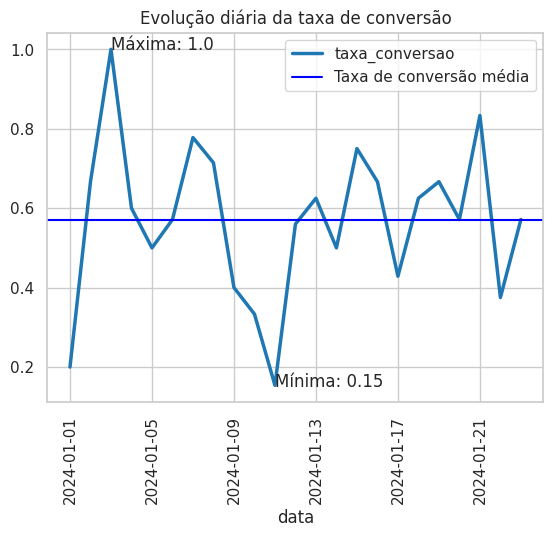

In [728]:
criar_grafico_linha_evolução_taxa_conversao_diaria(df_matheus, 1, 23)

## 8.5 Histogramas de venda real e taxa de conversão

In [729]:
def criar_histogramas_venda_real_taxa_conversao(dataframe : pd.core.frame.DataFrame, dia_inicial : int, dia_final : int):
  dataframe = dataframe.iloc[dia_inicial -1 : dia_final]

  sns.set_theme(style="ticks")
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
  sns.histplot(dataframe["venda_real"], ax=ax1, fill=True, color='blue')
  ax1.set_title("Histograma de receita de vendas reais")

  sns.histplot(dataframe["taxa_conversao"], ax=ax2, fill=True, color='green')
  ax2.set_title("Histograma de taxa de conversão")
  plt.tight_layout()
  plt.show()

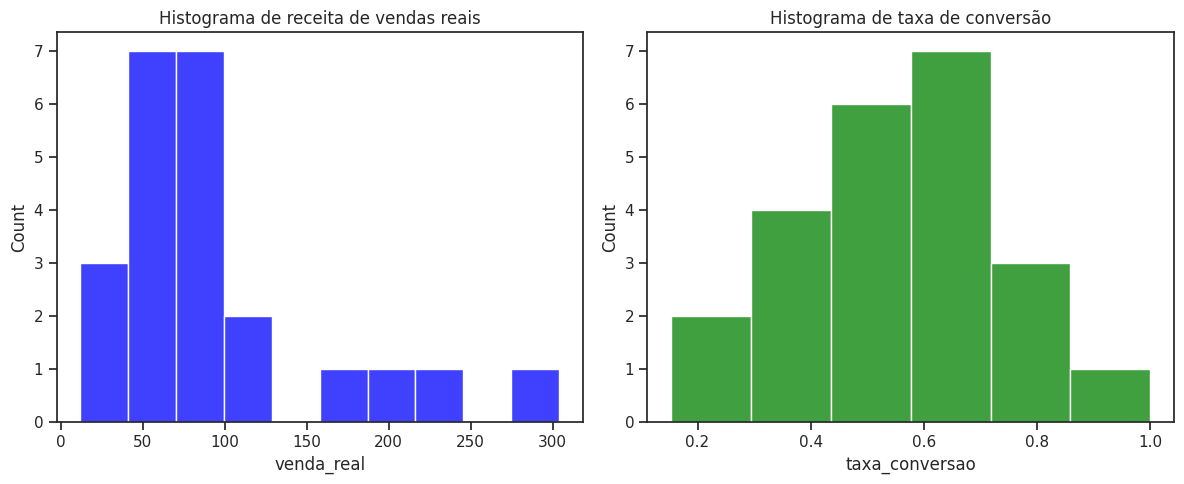

In [730]:
criar_histogramas_venda_real_taxa_conversao(df_matheus, 1, 23)

## 8.6 Boxplot de venda real e taxa de conversão

In [731]:
def criar_boxplots_venda_real_taxa_conversao(dataframe : pd.core.frame.DataFrame, dia_inicial : int, dia_final : int):
  dataframe = dataframe.iloc[dia_inicial -1 : dia_final]

  sns.set_theme(style="ticks")
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
  sns.boxplot(dataframe["venda_real"], ax=ax1, fill=True, color='blue')
  percentis = np.percentile(dataframe["venda_real"], [25, 50, 75, 100])
  for i, p in enumerate(percentis):
    ax1.text(0, p, f'{p:.2f}', horizontalalignment='center', color='black', fontsize=10, weight='bold', backgroundcolor='white', bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='lightgrey'))

  ax1.set_title("Boxplot de receita de vendas reais")

  sns.boxplot(dataframe["taxa_conversao"], ax=ax2, fill=True, color='green')
  percentis2 = np.percentile(dataframe["taxa_conversao"], [25, 50, 75, 100])
  for i, p in enumerate(percentis2):
    ax2.text(0, p, f'{p:.2f}', horizontalalignment='center', color='black', fontsize=10, weight='bold', backgroundcolor='white', bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='lightgrey'))
  ax2.set_title("Boxplot de taxa de conversão")
  plt.tight_layout()
  plt.show()

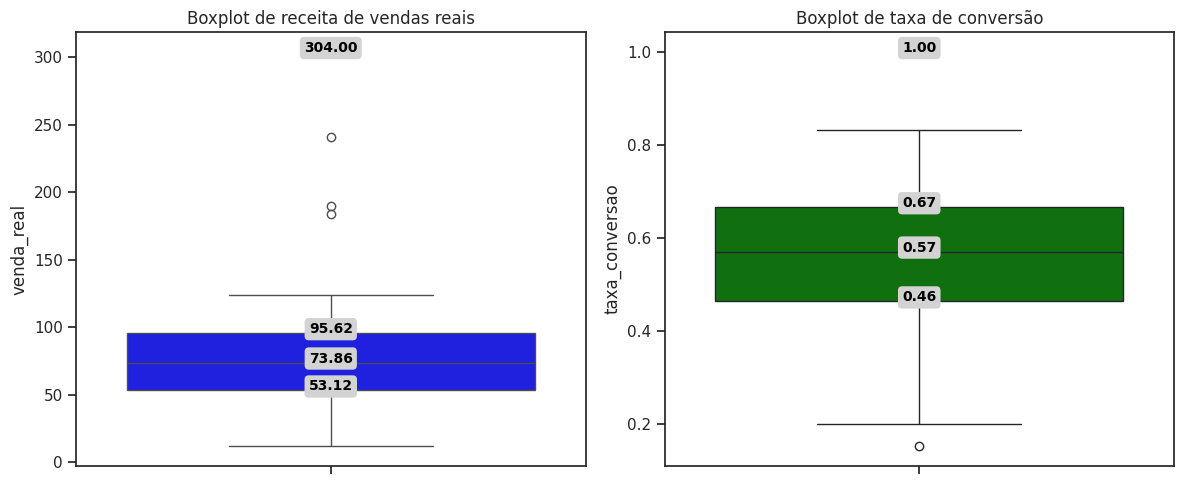

In [732]:
criar_boxplots_venda_real_taxa_conversao(df_matheus, 1, 23)

# 9. Análise dos vendedores

## 9.1 Vendedor: Pedro

### 9.1.0 Dataset tratado

In [733]:
df_pedro = dic_dataframes["df_pedro"]
df_pedro.head(31)

,venda_real,venda_projetada,venda_diferenca,acumulado_real,acumulado_projetado,tendencia,clientes_abordados,vendas_fechadas,taxa_conversao,dia_da_semana
data,,,,,,,,,,
2024-01-01,78.2640,64.516129,13.747871,78.2640,64.516129,78.2640,3,4,1.333333,Monday
2024-01-02,39.1320,64.516129,-25.384129,117.3960,129.032258,117.3960,5,5,1.000000,Tuesday
2024-01-03,48.9150,64.516129,-15.601129,166.3110,193.548387,166.3110,6,4,0.666667,Wednesday
2024-01-04,58.6980,64.516129,-5.818129,225.0090,258.064516,225.0090,2,2,1.000000,Thursday
2024-01-05,68.4810,64.516129,3.964871,293.4900,322.580645,293.4900,8,5,0.625000,Friday
2024-01-06,117.3960,64.516129,52.879871,410.8860,387.096774,410.8860,5,6,1.200000,Saturday
2024-01-07,185.8770,64.516129,121.360871,596.7630,451.612903,596.7630,4,3,0.750000,Sunday
2024-01-08,9.7830,64.516129,-54.733129,606.5460,516.129032,606.5460,3,3,1.000000,Monday
2024-01-09,14.6745,64.516129,-49.841629,621.2205,580.645161,621.2205,2,2,1.000000,Tuesday


### 9.1.1 Dados

In [734]:
avaliar_metricas_mensais_principais_vendedor(df_pedro,1,31)

{'Total de Vendas no período': 1596.38,
 'Total de vendas fechadas': 74,
 'Total de clientes abordados': 88,
 'Taxa de conversão geral no período': 0.72,
 'Dias com vendas': 23}

In [735]:
avaliar_metricas_mensais_secundarias_vendedor(df_pedro,1,23)

,Mínimo,Médio,Máximo,Amplitude
Métrica,,,,
Venda Real,9.78,69.41,195.66,185.88
Venda Diferença,-54.73,4.89,131.14,185.88
Vendas Fechadas,1.00,3.22,7.00,6.00
Clientes por Dia,1.00,3.83,10.00,9.00
Taxa de Conversão,0.20,0.97,2.00,1.80


In [736]:
venda_real_por_cliente_pedro = avaliar_media_receita_venda_real_por_cliente_abordado(df_pedro,1,31)
venda_real_por_venda_fechada_pedro = avaliar_media_receita_venda_real_por_venda_fechada(df_pedro,1,31)
potencial_caso_taxa_conversao_100porcento_pedro = avaliar_metrica_receita_venda_real_vezes_taxa_conversao_media(df_pedro,1,31)
print(f"Venda real por cliente: R$ {venda_real_por_cliente_pedro}\nVenda real por venda fechada: R$ {venda_real_por_venda_fechada_pedro}\nPotencial com taxa de conversão: R$ {potencial_caso_taxa_conversao_100porcento_pedro}")

Venda real por cliente: R$ 18.14
Venda real por venda fechada: R$ 21.57
Potencial com taxa de conversão: R$ 1150.45


### 9.1.2 Visualizações

<ipython-input-721-48802b221916>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, palette="tab10", linewidth=2.5)


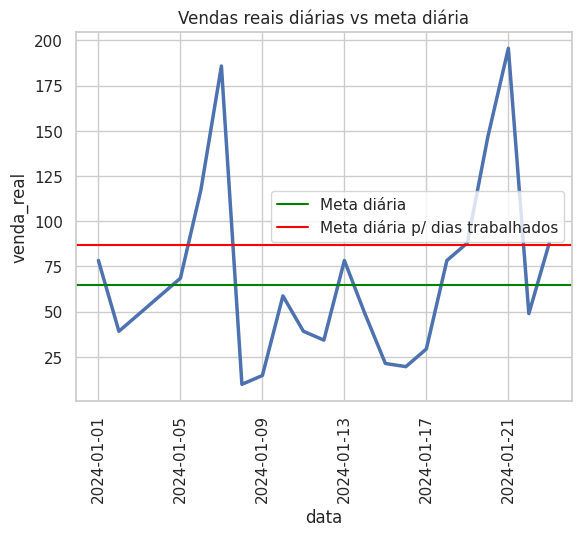

In [737]:
criar_grafico_linha_venda_real_vs_meta(dataframes, "df_pedro", 1, 23)

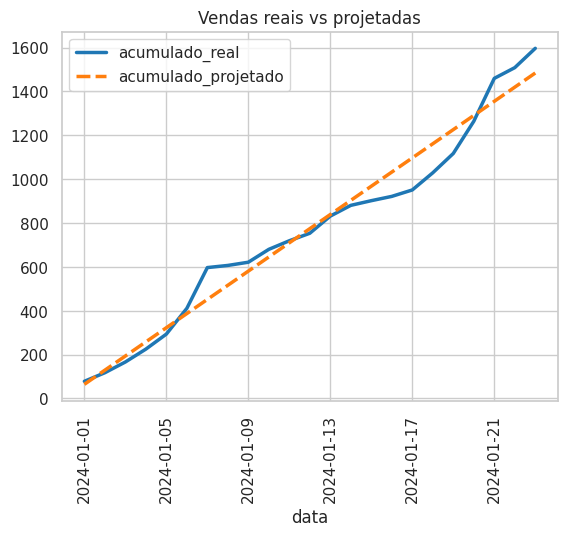

In [738]:
criar_grafico_linha_acumulado_vendas_vs_projetadas(df_pedro, 1, 23)

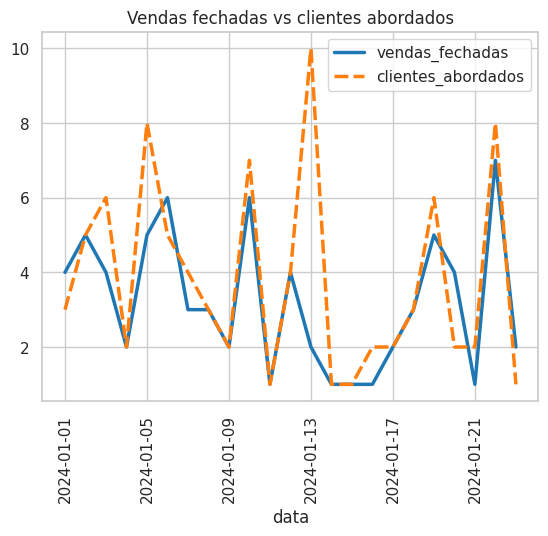

In [739]:
criar_grafico_linha_vendas_fechadas_vs_clientes_abordados(df_pedro, 1, 23)

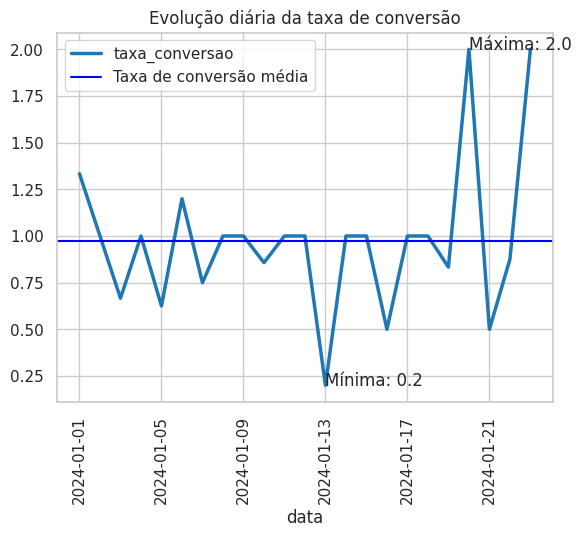

In [740]:
criar_grafico_linha_evolução_taxa_conversao_diaria(df_pedro, 1, 23)

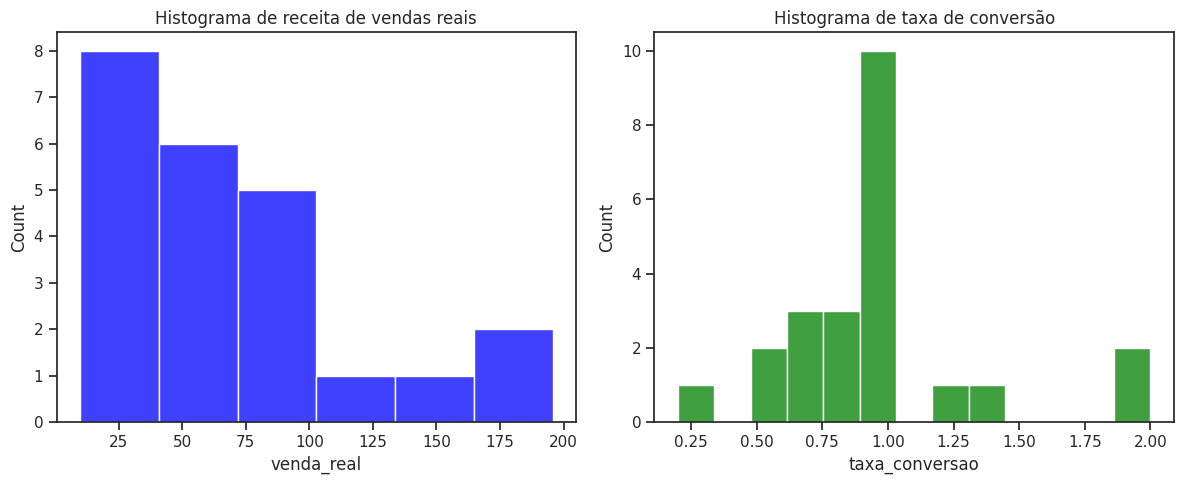

In [741]:
criar_histogramas_venda_real_taxa_conversao(df_pedro, 1, 23)

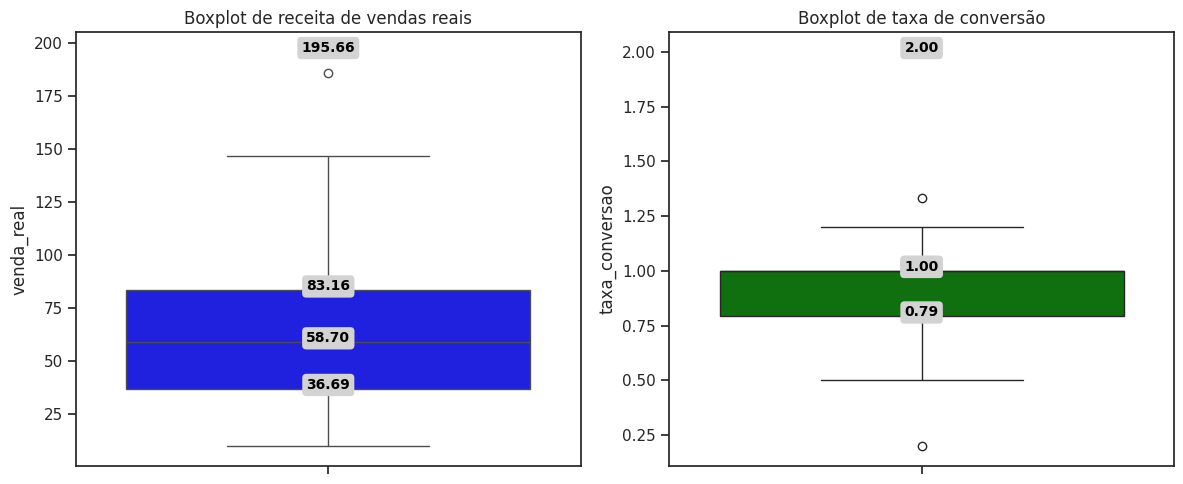

In [742]:
criar_boxplots_venda_real_taxa_conversao(df_pedro, 1, 23)

### 9.1.3 Pontos positivos e negativos

## Pontos Positivos

- Diferença entre venda real e meta diária é geralmente positiva
- Taxa de conversão média é 97% e maior parte dos dias fica entre 75 e 100%
- Taxa de conversão diária manteve-se no começo do período, caiu um pouco no meio mas subiu no final do período.


## Pontos Negativos

- Não alcançou meta mensal 1594,00 de 2000,00;
- Dificlmente atinge meta diaria se considerar meta por dias trabalhados
- Aborda mais clientes do que consegue vendas reais 74 vendas para 88 clientes
- Venda real média é 69,41 e o valor oscila muito durante o período, não há constância diferença entre máximo e mínimo é 185,00
- 50% dos valores de receita diária fica entre 36,00 e 83,00
- Receita máxima diária sem ser outlier é por volta de 150,00
- taxa de conversão máxima 200% é outlier

## 9.2 Vendedor: Maria

### 9.2.0 Dataset tratado

In [743]:
df_maria = dic_dataframes["df_maria"]
df_maria.head(31)

,venda_real,venda_projetada,venda_diferenca,acumulado_real,acumulado_projetado,tendencia,clientes_abordados,vendas_fechadas,taxa_conversao,dia_da_semana
data,,,,,,,,,,
2024-01-01,124.00,64.516129,59.483871,124.00,64.516129,124.00,8,9,1.125000,Monday
2024-01-02,30.00,64.516129,-34.516129,154.00,129.032258,154.00,8,3,0.375000,Tuesday
2024-01-03,80.00,64.516129,15.483871,234.00,193.548387,234.00,6,3,0.500000,Wednesday
2024-01-04,90.00,64.516129,25.483871,324.00,258.064516,324.00,4,4,1.000000,Thursday
2024-01-05,20.00,64.516129,-44.516129,344.00,322.580645,344.00,3,7,2.333333,Friday
2024-01-06,200.00,64.516129,135.483871,544.00,387.096774,544.00,7,5,0.714286,Saturday
2024-01-07,407.00,64.516129,342.483871,951.00,451.612903,951.00,5,7,1.400000,Sunday
2024-01-08,12.00,64.516129,-52.516129,963.00,516.129032,963.00,3,1,0.333333,Monday
2024-01-09,67.00,64.516129,2.483871,1030.00,580.645161,1030.00,1,1,1.000000,Tuesday


### 9.2.1 Dados

In [744]:
avaliar_metricas_mensais_principais_vendedor(df_maria,1,31)

{'Total de Vendas no período': 2539.52,
 'Total de vendas fechadas': 101,
 'Total de clientes abordados': 112,
 'Taxa de conversão geral no período': 0.89,
 'Dias com vendas': 23}

In [745]:
avaliar_metricas_mensais_secundarias_vendedor(df_maria,1,23)

,Mínimo,Médio,Máximo,Amplitude
Métrica,,,,
Venda Real,12.00,110.41,407.00,395.00
Venda Diferença,-52.52,45.90,342.48,395.00
Vendas Fechadas,1.00,4.39,9.00,8.00
Clientes por Dia,1.00,4.87,10.00,9.00
Taxa de Conversão,0.33,1.20,4.00,3.67


In [746]:
venda_real_por_cliente_maria = avaliar_media_receita_venda_real_por_cliente_abordado(df_maria,1,23)
venda_real_por_venda_fechada_maria = avaliar_media_receita_venda_real_por_venda_fechada(df_maria,1,23)
potencial_caso_taxa_conversao_100porcento_maria = avaliar_metrica_receita_venda_real_vezes_taxa_conversao_media(df_maria,1,23)
print(f"Venda real por cliente: R$ {venda_real_por_cliente_maria}\nVenda real por venda fechada: R$ {venda_real_por_venda_fechada_maria}\nPotencial com taxa de conversão: R$ {potencial_caso_taxa_conversao_100porcento_maria}")

Venda real por cliente: R$ 22.67
Venda real por venda fechada: R$ 25.14
Potencial com taxa de conversão: R$ 3052.07


### 9.2.2 Visualizações

<ipython-input-721-48802b221916>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, palette="tab10", linewidth=2.5)


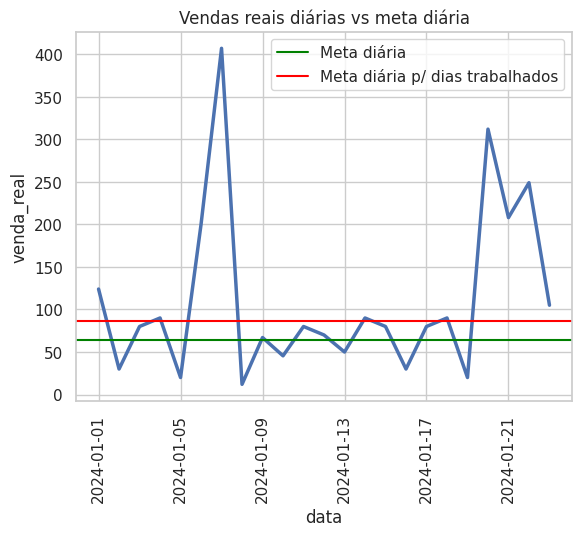

In [747]:
criar_grafico_linha_venda_real_vs_meta(dataframes, "df_maria", 1, 23)

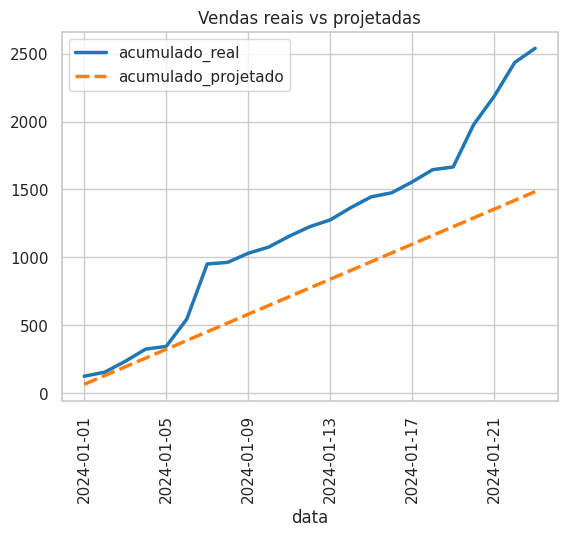

In [748]:
criar_grafico_linha_acumulado_vendas_vs_projetadas(df_maria, 1, 23)

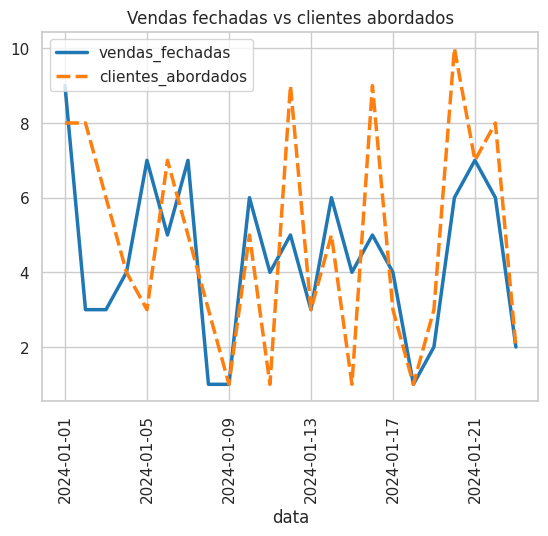

In [749]:
criar_grafico_linha_vendas_fechadas_vs_clientes_abordados(df_maria, 1, 23)

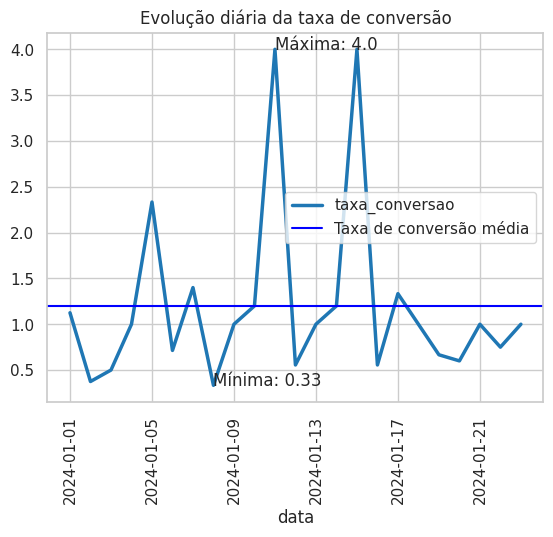

In [750]:
criar_grafico_linha_evolução_taxa_conversao_diaria(df_maria, 1, 23)

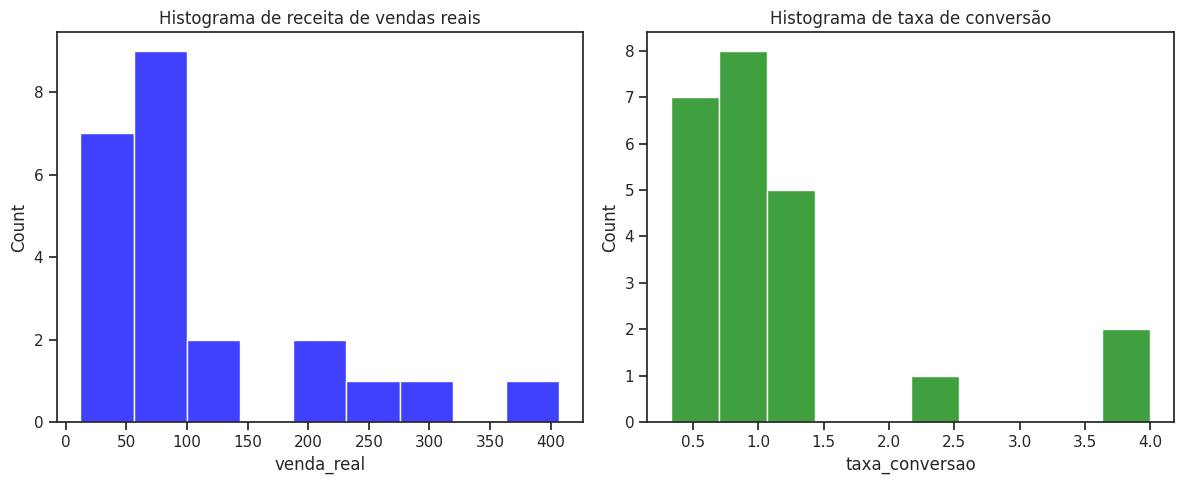

In [751]:
criar_histogramas_venda_real_taxa_conversao(df_maria, 1, 23)

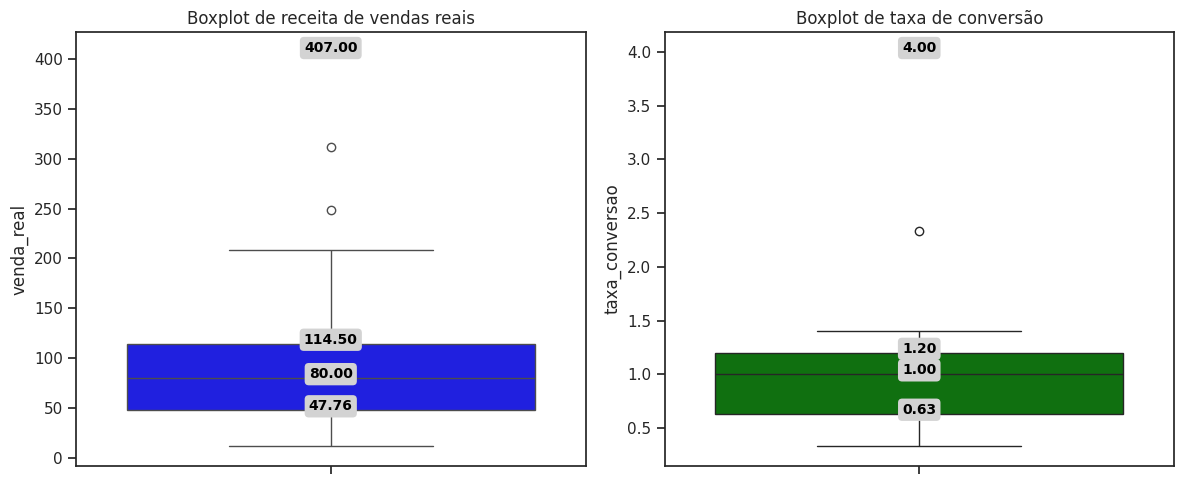

In [752]:
criar_boxplots_venda_real_taxa_conversao(df_maria, 1, 23)

### 9.2.3 Pontos positivos e negativos

## Pontos Positivos


- Alcançou meta mensal 2539,00 de 2000,00
- Taxa de conversão média em dias trabalhados é 120%
- Venda real média é 110,00
- Vendas fechadas em média 4,39 por dia
- Em média, aborda 4,87 clientes por dia
- Venda diferença em geral é positiva, 10x maior que de Pedro
- Maior parte dos dias receita é menor que 100,00, mas ainda melhor do que Pedro
- 50% dos dias, a receita fica entre 47,00 e 114,00
- sem os dois outliers, a receita máxima fica por volta de 200,00
- 50% dos dias, a taxa de conversão fica entre 63% e 120%
- sem os dois outliers, a taxa máxima fica entre 130% e 150%

## Pontos negativos

- Aborda mais clientes do que consegue vendas reais 101 vendas para 112 clientes
- Receita de vendas diárias oscila muito, com amplitude de 395,00 e valor mínimo 12,00
- Taxa de conversão diária oscila muito, com amplitude de 367% e taxa mínima de 33%



## 9.3 Vendedor: Matheus

### 9.3.0 Dataset tratado

In [753]:
df_matheus = dic_dataframes["df_matheus"]
df_matheus.head(31)

,venda_real,venda_projetada,venda_diferenca,acumulado_real,acumulado_projetado,tendencia,clientes_abordados,vendas_fechadas,taxa_conversao,dia_da_semana
data,,,,,,,,,,
2024-01-01,304.000000,64.516129,239.483871,304.000000,64.516129,304.000000,10,2,0.200000,Monday
2024-01-02,56.150000,64.516129,-8.366129,360.150000,129.032258,360.150000,3,2,0.666667,Tuesday
2024-01-03,12.000000,64.516129,-52.516129,372.150000,193.548387,372.150000,20,20,1.000000,Wednesday
2024-01-04,90.164547,64.516129,25.648418,462.314547,258.064516,462.314547,5,3,0.600000,Thursday
2024-01-05,50.091415,64.516129,-14.424714,512.405962,322.580645,512.405962,6,3,0.500000,Friday
2024-01-06,123.970000,64.516129,59.453871,636.375962,387.096774,636.375962,7,4,0.571429,Saturday
2024-01-07,184.210000,64.516129,119.693871,820.585962,451.612903,820.585962,9,7,0.777778,Sunday
2024-01-08,190.000000,64.516129,125.483871,1010.585962,516.129032,1010.585962,7,5,0.714286,Monday
2024-01-09,83.089647,64.516129,18.573518,1093.675609,580.645161,1093.675609,5,2,0.400000,Tuesday


### 9.3.1 Dados

In [754]:
avaliar_metricas_mensais_principais_vendedor(df_matheus,1,31)

{'Total de Vendas no período': 2154.02,
 'Total de vendas fechadas': 108,
 'Total de clientes abordados': 186,
 'Taxa de conversão geral no período': 0.42,
 'Dias com vendas': 23}

In [755]:
avaliar_metricas_mensais_secundarias_vendedor(df_matheus,1,23)

,Mínimo,Médio,Máximo,Amplitude
Métrica,,,,
Venda Real,12.00,93.65,304.00,292.00
Venda Diferença,-52.52,29.14,239.48,292.00
Vendas Fechadas,1.00,4.70,20.00,19.00
Clientes por Dia,3.00,8.09,25.00,22.00
Taxa de Conversão,0.15,0.57,1.00,0.85


In [756]:
venda_real_por_cliente_matheus = avaliar_media_receita_venda_real_por_cliente_abordado(df_matheus,1,23)
venda_real_por_venda_fechada_matheus = avaliar_media_receita_venda_real_por_venda_fechada(df_matheus,1,23)
potencial_caso_taxa_conversao_100porcento_matheus = avaliar_metrica_receita_venda_real_vezes_taxa_conversao_media(df_matheus,1,23)
print(f"Venda real por cliente: R$ {venda_real_por_cliente_matheus}\nVenda real por venda fechada: R$ {venda_real_por_venda_fechada_matheus}\nPotencial com taxa de conversão: R$ {potencial_caso_taxa_conversao_100porcento_matheus}")

Venda real por cliente: R$ 11.58
Venda real por venda fechada: R$ 19.94
Potencial com taxa de conversão: R$ 1225.96


### 9.3.2 Visualizações

<ipython-input-721-48802b221916>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, palette="tab10", linewidth=2.5)


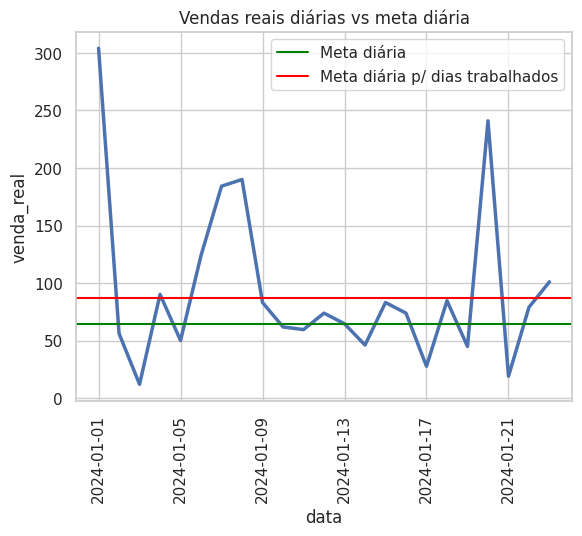

In [757]:
criar_grafico_linha_venda_real_vs_meta(dataframes, "df_matheus", 1, 23)

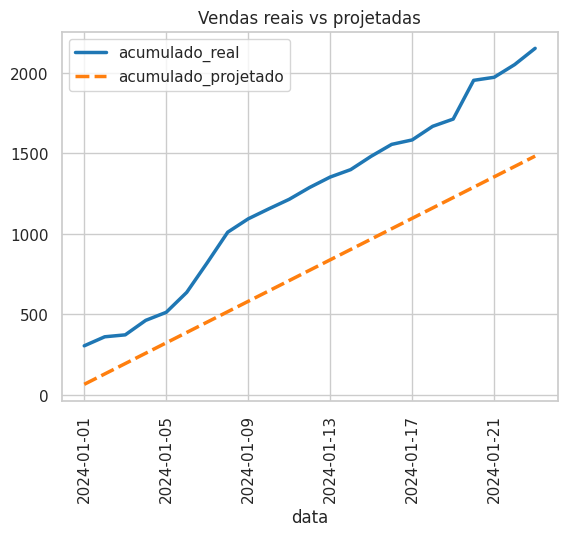

In [758]:
criar_grafico_linha_acumulado_vendas_vs_projetadas(df_matheus, 1, 23)

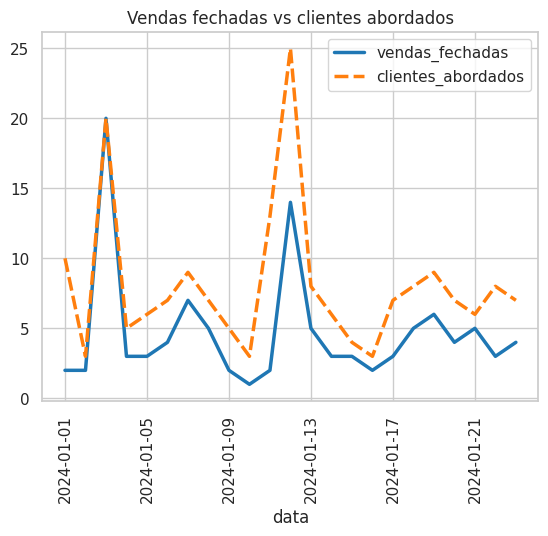

In [759]:
criar_grafico_linha_vendas_fechadas_vs_clientes_abordados(df_matheus, 1, 23)

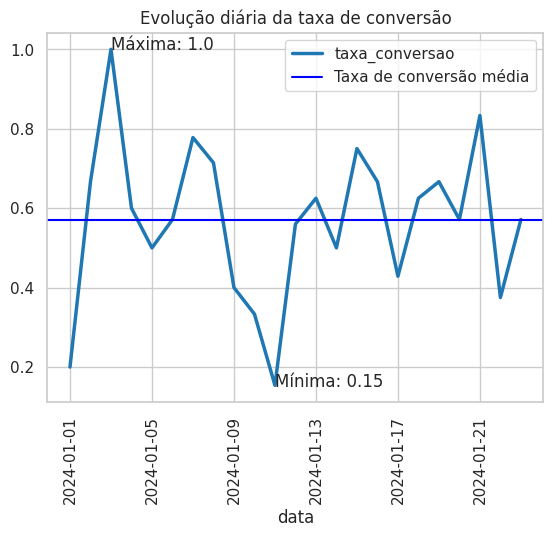

In [760]:
criar_grafico_linha_evolução_taxa_conversao_diaria(df_matheus, 1, 23)

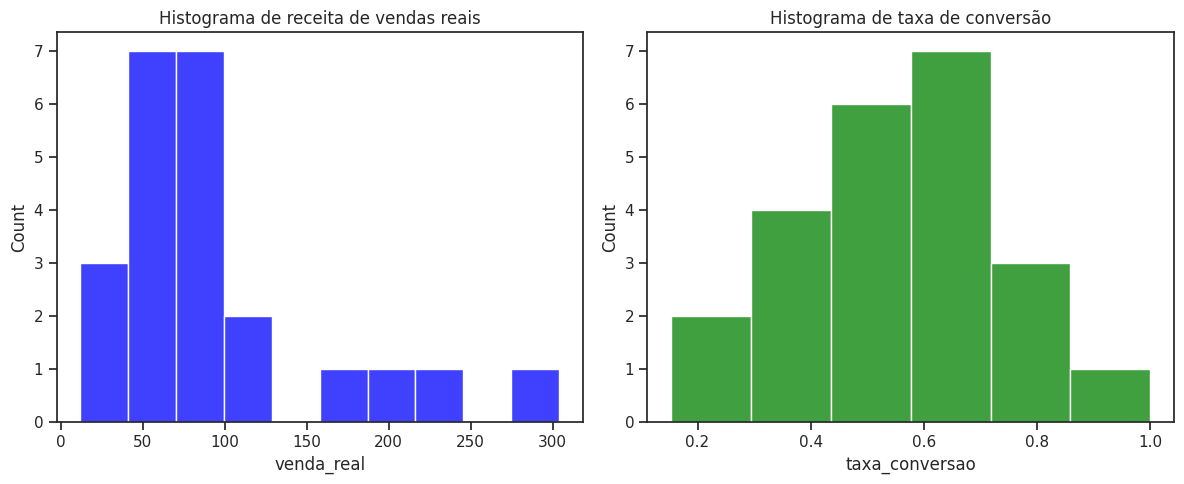

In [761]:
criar_histogramas_venda_real_taxa_conversao(df_matheus, 1, 23)

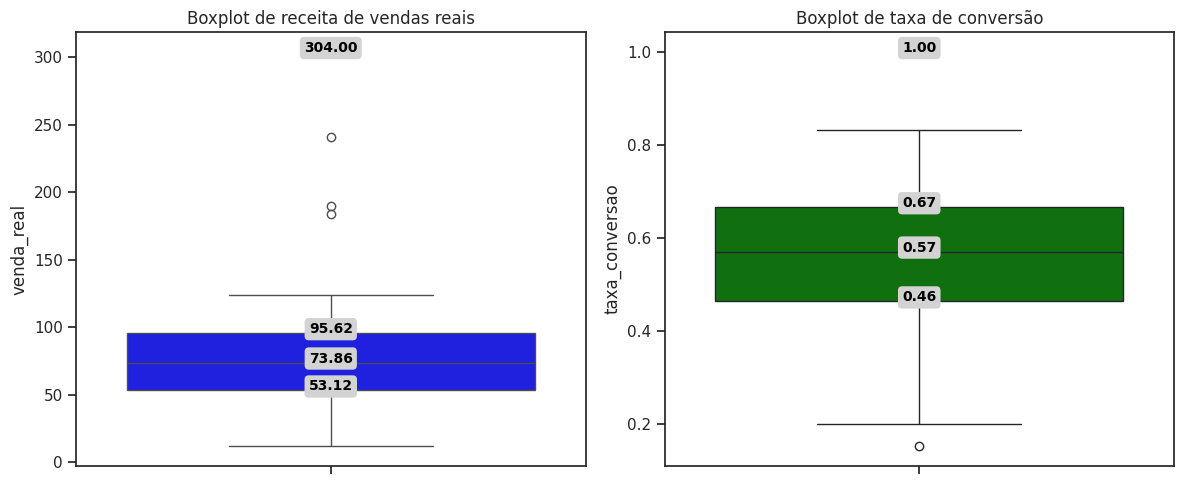

In [762]:
criar_boxplots_venda_real_taxa_conversao(df_matheus, 1, 23)

### 9.3.3 Pontos positivos e negativos

## Pontos Positivos


- Alcançou meta mensal 2154,00 de 2000,00
- Venda real média é 93,65
- Vendas fechadas em média 4,7 por dia
- Em média, aborda 8 clientes por dia, é o que mais aborda
- Venda diferença em geral é positiva, entre Maria e Pedro
- Maior parte dos dias receita é menor que 100,00, mas ainda melhor do que Pedro
- 50% dos dias, a receita fica entre 53,00 e 95,00
- sem os dois outliers, a receita máxima fica por entre 100,00 e 150,00
- Evolução da taxa de conversão no período começa com baixa tem um pico, depois se mantém constante, com um outro pico

## Pontos negativos

- Taxa de conversão média em dias trabalhados é quase 57%
- Aborda mais clientes do que consegue vendas reais 108 vendas para 186 clientes
- Receita de vendas diárias oscila muito, com amplitude de 292,00 e valor mínimo 12,00
- Taxa de conversão diária oscila muito, com amplitude de 85% e taxa mínima de 12%. Oscila menos, mais a taxa de conversão não é tão alta quanto a de Maria
- 50% dos dias, a taxa de conversão fica entre 46% e 67%
- sem os dois outliers, a taxa máxima fica pouco acima de 80%
- Há muitos outliers na receita com vendas

# 10. Comparação

## 10.1 Tabelas

### 10.1.1 Funções de tabelas

In [763]:
def criar_tabela_metricas_mensais_principais_vendedores(dic_dataframes : dict, dia_inicial : int, dia_final : int):
  dic_metricas_principais_vendedores = dict()
  for chave, dataframe in dic_dataframes.items():
    dataframe = dataframe.iloc[dia_inicial -1 : dia_final]
    nome_vendedor = achar_nome_vendedor_planilha(raw_datasets[chave])
    resultado = avaliar_metricas_mensais_principais_vendedor(dataframe, dia_inicial, dia_final)
    dic_metricas_principais_vendedores.update({nome_vendedor : resultado})

  data = [[resultado_metrica for metrica, resultado_metrica in resultado.items()] for resultado in dic_metricas_principais_vendedores.values()]
  index = (nome_vendedor for nome_vendedor, resultado in dic_metricas_principais_vendedores.items())
  nomes_colunas_tabela = resultado.keys()
  tabela_metricas_mensais_principais_vendedores = pd.DataFrame(data, columns = nomes_colunas_tabela, index = index)

  # print(f"Data: {data}")
  # print(f"Nomes: {nomes_colunas_tabela}")
  # print(f"index: {index}")

  return tabela_metricas_mensais_principais_vendedores

In [764]:
def criar_tabelas_metricas_mensais_secundarias_vendedores(dic_dataframes : dict, dia_inicial : int, dia_final : int):
  for chave, dataframe in dataframes.items():
    nome_vendedor = achar_nome_vendedor_planilha(raw_datasets[chave])
    tabela = avaliar_metricas_mensais_secundarias_vendedor(dataframe, dia_inicial, dia_final)
    print(f"Nome do vendedor: {nome_vendedor}\n{tabela}\n")

In [765]:
def criar_tabela_potencial_vendedores(dic_dataframes : dict(), dia_inicial : int, dia_final : int):
  nomes_colunas_tabela = ["Venda real/cliente","Venda real/venda fechada","Potencial com taxa de conversão média"]
  dicionario_tabela = dict()
  for chave, dataframe in dataframes.items():
    nome_vendedor = achar_nome_vendedor_planilha(raw_datasets[chave])
    argumentos = [dataframe, dia_inicial, dia_final]
    media_receita_venda_real_por_cliente_abordado = avaliar_media_receita_venda_real_por_cliente_abordado(*argumentos)
    media_receita_venda_real_por_venda_fechada = avaliar_media_receita_venda_real_por_venda_fechada(*argumentos)
    metrica_receita_venda_real_vezes_taxa_conversao_media = avaliar_metrica_receita_venda_real_vezes_taxa_conversao_media(*argumentos)
    dicionario_tabela.update({nome_vendedor : [media_receita_venda_real_por_cliente_abordado, media_receita_venda_real_por_venda_fechada, metrica_receita_venda_real_vezes_taxa_conversao_media]})

  tabela_potencial_vendedor = pd.DataFrame(dicionario_tabela.values(), columns = nomes_colunas_tabela, index = dicionario_tabela.keys())

  return tabela_potencial_vendedor

### 10.1.2 Tabelas de comparação

In [766]:
criar_tabela_metricas_mensais_principais_vendedores(dataframes, 1, 23)

,Total de Vendas no período,Total de vendas fechadas,Total de clientes abordados,Taxa de conversão geral no período,Dias com vendas
Maria Clara,2539.52,101,112,1.20,23
Matheus Garcia,2154.02,108,186,0.57,23
Pedro Henrique,1596.38,74,88,0.97,23


In [767]:
criar_tabelas_metricas_mensais_secundarias_vendedores(dataframes, 1, 23)

Nome do vendedor: Maria Clara
                   Mínimo   Médio  Máximo  Amplitude
Métrica                                             
Venda Real          12.00  110.41  407.00     395.00
Venda Diferença    -52.52   45.90  342.48     395.00
Vendas Fechadas      1.00    4.39    9.00       8.00
Clientes por Dia     1.00    4.87   10.00       9.00
Taxa de Conversão    0.33    1.20    4.00       3.67

Nome do vendedor: Matheus Garcia
                   Mínimo  Médio  Máximo  Amplitude
Métrica                                            
Venda Real          12.00  93.65  304.00     292.00
Venda Diferença    -52.52  29.14  239.48     292.00
Vendas Fechadas      1.00   4.70   20.00      19.00
Clientes por Dia     3.00   8.09   25.00      22.00
Taxa de Conversão    0.15   0.57    1.00       0.85

Nome do vendedor: Pedro Henrique
                   Mínimo  Médio  Máximo  Amplitude
Métrica                                            
Venda Real           9.78  69.41  195.66     185.88
Venda Difer

In [768]:
criar_tabela_potencial_vendedores(dataframes, 1, 23)

,Venda real/cliente,Venda real/venda fechada,Potencial com taxa de conversão média
Maria Clara,22.67,25.14,3052.07
Matheus Garcia,11.58,19.94,1225.96
Pedro Henrique,18.14,21.57,1550.61


## 10.2 Conclusão

## Melhor vendedora no período: **Maria Clara**

### Motivos:
- vendeu mais no período
- número de vendas fechadas quase tão alto quanto o de Pedro, sendo que abordou apenas 60% do número de clientes abordados por ele
- maior taxa de conversão geral
- valor de receita de vendas médio é o maior
- vende mais por cliente abordado
- valor de receita com vendas é maior por venda fechada
- potencial de receita maior, caso taxa de conversão mantenha-se constante e com mais dias trabalhados